In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_theme(style='darkgrid')
%matplotlib inline
import missingno

In [31]:
df = pd.read_csv("netflix_titles.csv",low_memory=False )

In [32]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4695,s4696,Movie,Party Monster: Scratching the Surface,NaN,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,"August 17, 2018",2018,TV-14,33 min,Comedies,"In the probing documentary ""Party Monster,"" DJ..."
2224,s2225,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,","July 18, 2020",2018,TV-14,87 min,"Dramas, International Movies",Separated from their young son during the brut...
7918,s7919,TV Show,Sadqay Tumhare,Ehtesham Uddin,"Mahira Khan, Samiya Mumtaz, Adnan Malik, Rehan...",Pakistan,"December 15, 2016",2014,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",An arranged engagement between a village girl ...
7360,s7361,Movie,Lucky: No Time for Love,"Radhika Rao, Vinay Sapru","Salman Khan, Sneha Ullal, Mithun Chakraborty, ...",India,"November 15, 2017",2005,TV-14,131 min,"Dramas, International Movies, Romantic Movies","During an uprising in Russia's St. Petersburg,..."
5903,s5904,Movie,Creep,Patrick Brice,"Mark Duplass, Patrick Brice",United States,"July 14, 2015",2014,R,78 min,"Horror Movies, Independent Movies, Thrillers",When a cash-strapped videographer takes a job ...
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...
1860,s1861,TV Show,The Cabin with Bert Kreischer,NaN,"Bert Kreischer, Anthony Anderson, Caitlyn Jenn...",United States,"October 13, 2020",2020,TV-MA,1 Season,"Reality TV, TV Comedies",Fast-living comic Bert Kreischer heads to a ca...
1106,s1107,Movie,Cross: Rise of the Villains,"Patrick Durham, Paul G. Volk","Brian Austin Green, Vinnie Jones, Lori Heuring...",United States,"April 2, 2021",2019,R,100 min,Action & Adventure,"Armed with a mighty ancient amulet, a team of ..."
4498,s4499,TV Show,Project S The Series,NaN,"Wiwattanawarang Oabnithi, Mahayotaruk Thiti, L...",Thailand,"October 19, 2018",2017,TV-MA,4 Seasons,"International TV Shows, TV Dramas, Teen TV Shows",Sports and friendship intertwine in tales of a...
5348,s5349,TV Show,Close Your Eyes Before It’s Dark,NaN,"Bryan Shu-Hao Chang, Jian Man-shu, Yen Tsao, S...",Taiwan,"August 1, 2017",2016,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","While vacationing at a mountain cabin, a group..."


In [33]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [34]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [35]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<strong>Visualize Missing Values</strong>

<AxesSubplot:>

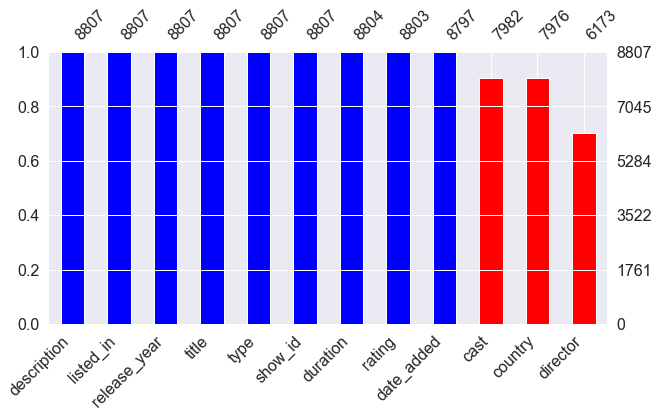

In [36]:
colors=["blue","blue","blue","blue","blue","blue","blue","blue","blue","red","red","red"]
missingno.bar(df,color=colors,figsize=(10,5),sort="descending")

<strong>Impute Missing Values</strong>

In [37]:
df["cast"]=df["cast"].fillna("DataNotAvailable")
df["duration"]=df["duration"].fillna(df["duration"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])
df["date_added"]=df["date_added"].fillna(df["date_added"].mode()[0])
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["director"]=df["director"].fillna(df["director"].mode()[0])

In [38]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [39]:
df.duplicated().sum()

0

<strong>Drive some columns</strong>

In [40]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [41]:
df["year_added"]=df["date_added"].dt.year
df["month_added"]=df["date_added"].dt.month
df["month_name_added"]=df["date_added"].dt.month_name()

In [42]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'month_name_added'],
      dtype='object')

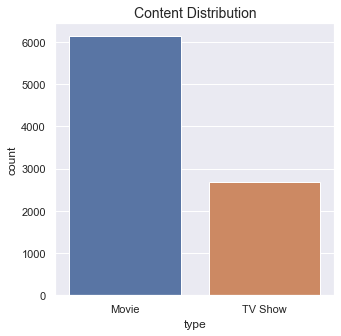

In [132]:
show_type=df["type"].value_counts().reset_index().rename(columns={"index":"type","type":"count"})
fig = plt.figure(1,figsize=(5,5),edgecolor="red")
sbn.barplot(x="type",y="count",data=show_type)
plt.title("Content Distribution",fontdict={"fontsize":"14"})
plt.show()

Findings:- <br/>
Moive is most watched.

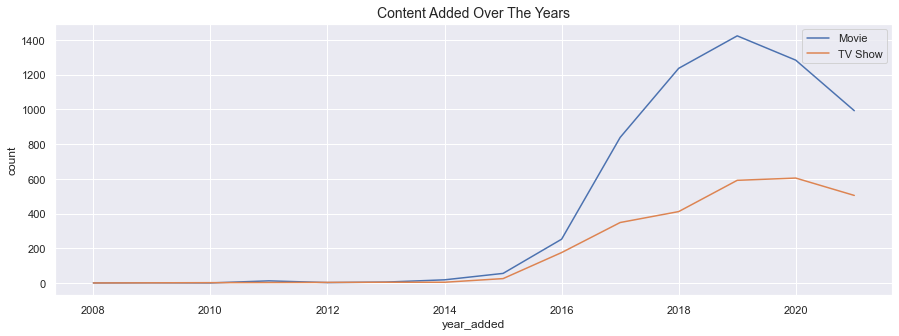

In [128]:
shows_added=df.groupby(["year_added","type"])["type"].count().reset_index(name="count").sort_values(by=["count","year_added"],ascending=[False,False])
fig = plt.figure(3,figsize=(15,5),edgecolor="red")
sbn.lineplot(x="year_added",y="count", hue="type",data=shows_added)
plt.legend(loc='upper right')
plt.title("Content Added Over The Years",fontdict={"fontsize":"14"})
plt.show()

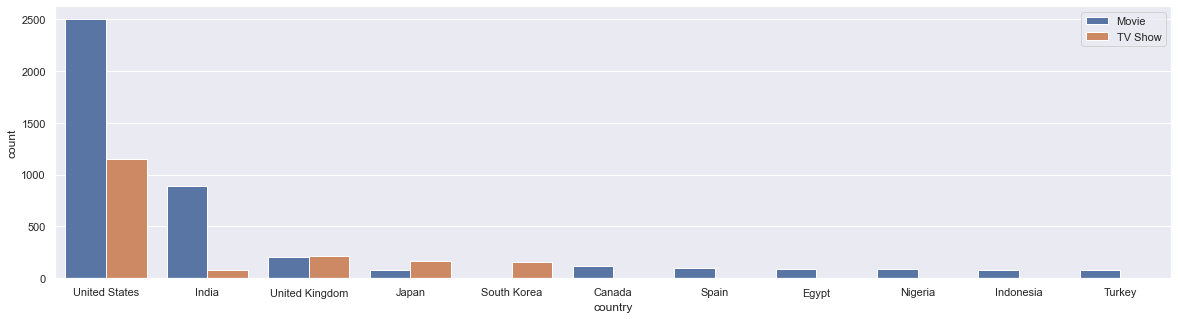

In [112]:
country=df.groupby(["country","type"])["type"].count().reset_index(name="count").sort_values(by=["count"],ascending=[False])[:15]
fig = plt.figure(2,figsize=(20,5),edgecolor="red")
sbn.barplot(x="country",y="count", hue="type",data=country,dodge=True)
plt.legend(loc='upper right')
plt.show()

<strong>Findings</strong>:<br/>
1. Most of the users watching movies in most of the  countries except japan and south koera

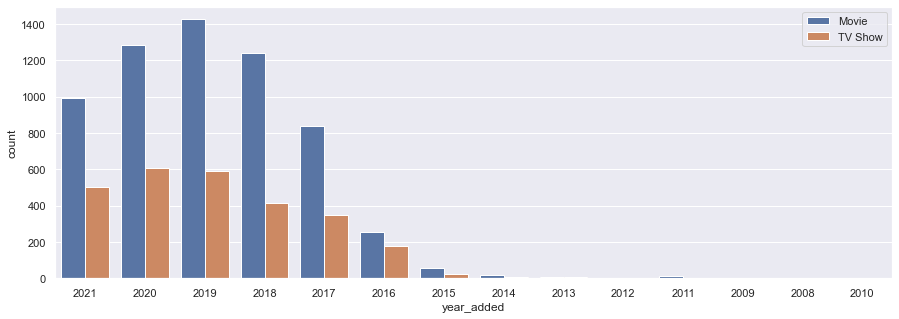

In [118]:
shows_added=df.groupby(["year_added","type"])["type"].count().reset_index(name="count").sort_values(by=["count","year_added"],ascending=[False,False])
fig = plt.figure(3,figsize=(15,5),edgecolor="red")
sbn.barplot(x="year_added",y="count", hue="type",data=shows_added,order=df["year_added"].unique())
plt.legend(loc='upper right')
plt.show()

<strong>Findings</strong>:<br/>
1. Highest Number of Movies and Tv Shows added in year 2020,2021

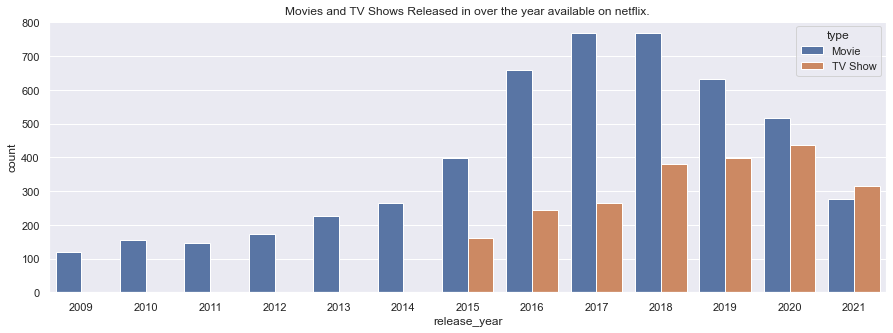

In [172]:
shows_release=df.groupby(["release_year","type"])["type"].count().reset_index(name="count").sort_values(by=["count","release_year"],ascending=[False,False])[:20]
fig = plt.figure(4,figsize=(15,5),edgecolor="red")
sbn.barplot(x="release_year",y="count",hue="type",data=shows_release)
plt.title("Movies and TV Shows Released in over the year available on netflix.")
plt.show()